This notebook loads the PIMA dataset and analyze it: Shows relevant information, histograms, correlations between features and the outcome variable...

## Import statements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from helpers import load_dataset

%matplotlib inline

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
data = load_dataset()

## Show dataset basic info

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Histograms

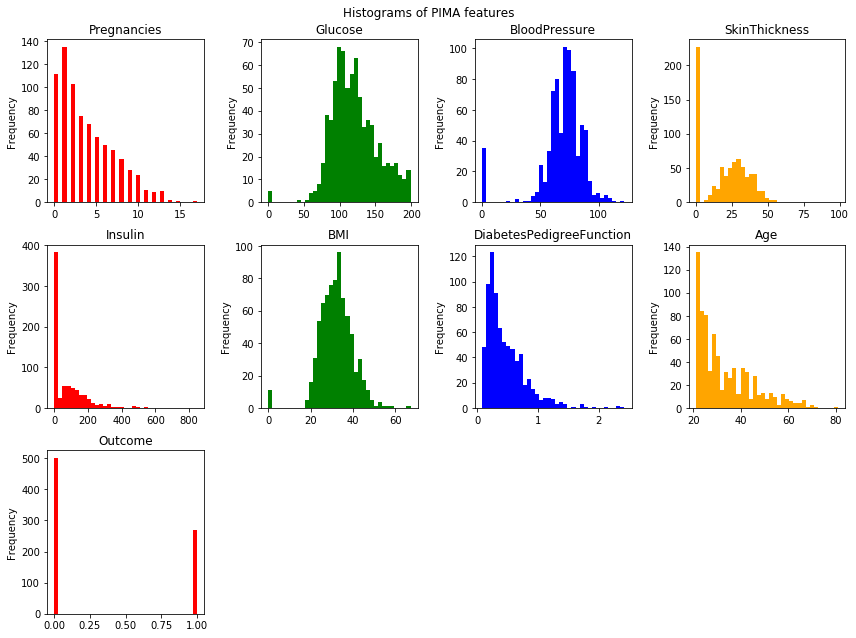

In [6]:
from itertools import count, cycle

fig, ax = plt.subplots(3, 4, figsize=(12, 9))
for i in range(len(data.columns), 3*4):
    ax[i // 4, i % 4].set_visible(False)

plt.suptitle('Histograms of PIMA features')
for i, feature, color in zip(count(0), data.columns, cycle(['Red', 'Green', 'Blue', 'Orange'])):
    plt.sca(ax[i // 4,i % 4])
    data[feature].plot.hist(bins=35, color=color)
    plt.title(feature)
plt.tight_layout()
plt.subplots_adjust(top=0.93)

## Correlations between features and outcome variable

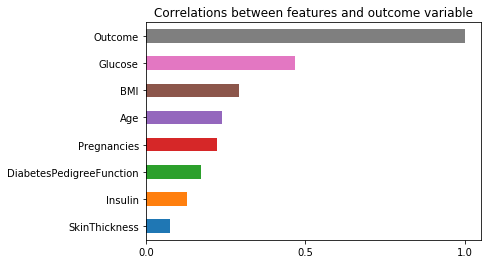

In [17]:
correlations = data.corr()['Outcome'].sort_values(ascending=True).iloc[1:]
correlations.plot.barh()
plt.title('Correlations between features and outcome variable');
plt.xticks([0, 0.5, 1]);

## Correlations between features

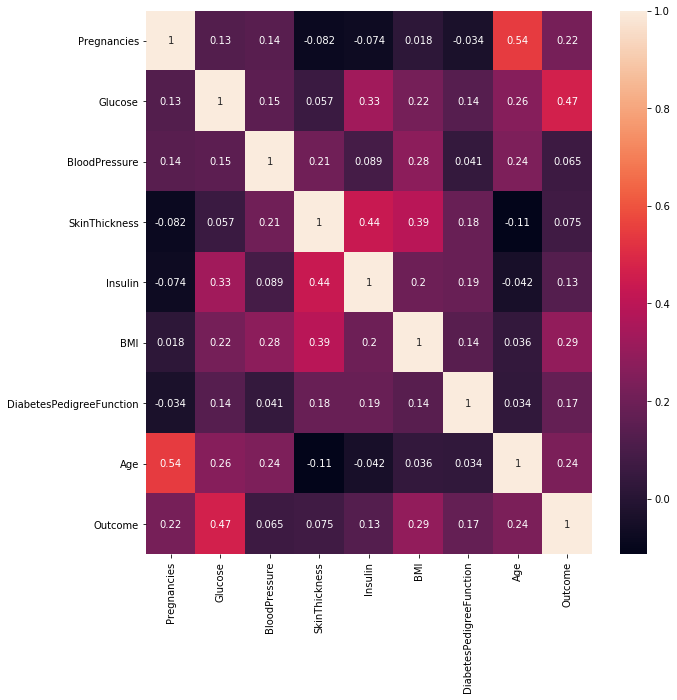

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True);

## Analyze separability of dataset samples

In [46]:
info = pd.DataFrame({'Number of samples': data['Outcome'].value_counts()})
info.index = ['Without diabetes', 'With diabetes']
info

,Number of samples
Without diabetes,500
With diabetes,268


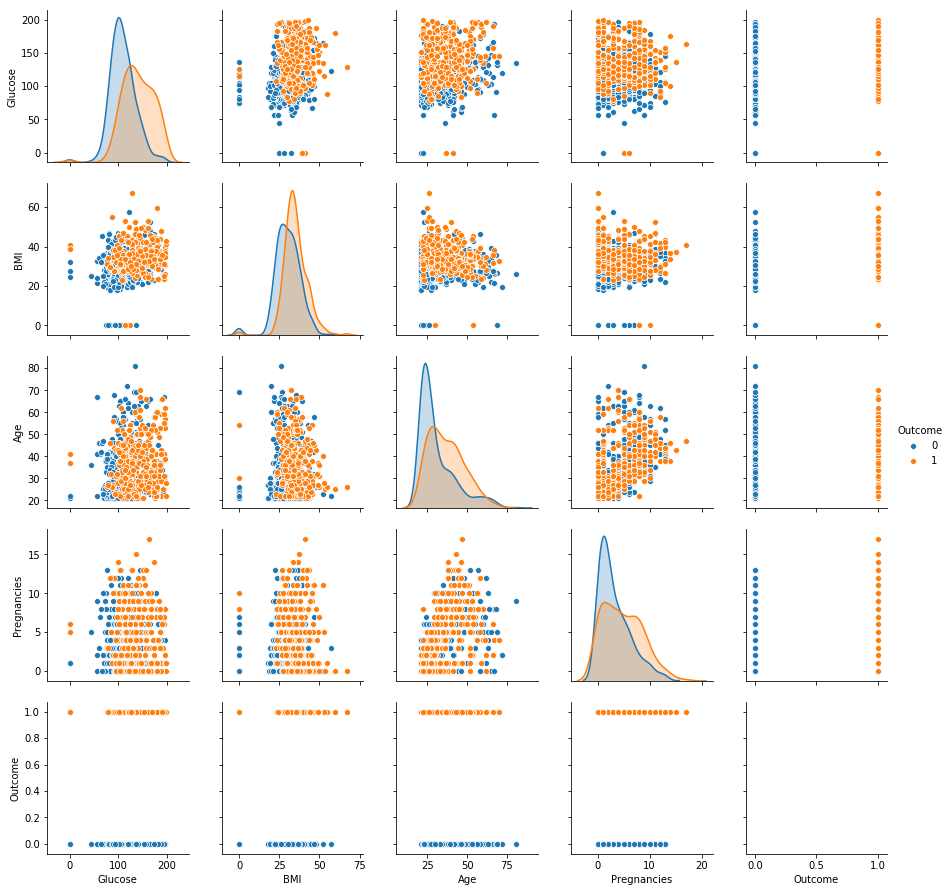

In [23]:
import seaborn as sns
sns.pairplot(data[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']], diag_kind='kde', hue='Outcome');

## Create very simplistic estimators

Our estimators must be better than this models

In [52]:
# Create our matrix of features (X) and the vector with target variable labels (y)
X = data.drop(columns='Outcome')
y = data['Outcome']

### Predict that all pacients have diabetes

In [57]:
y_pred = np.repeat(1, len(y))

In [64]:
# Show accuracy
print('Accuracy score: {:3f}\n'.format(accuracy_score(y, y_pred)))

# Show classification report
print(classification_report(y, y_pred))

Accuracy score: 0.348958

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.35      1.00      0.52       268

   micro avg       0.35      0.35      0.35       768
   macro avg       0.17      0.50      0.26       768
weighted avg       0.12      0.35      0.18       768



### Predict that all pacients dont have diabetes

In [66]:
y_pred = np.repeat(0, len(y))

print('Accuracy score: {:3f}\n'.format(accuracy_score(y, y_pred)))
print(classification_report(y, y_pred))

Accuracy score: 0.651042

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       500
           1       0.00      0.00      0.00       268

   micro avg       0.65      0.65      0.65       768
   macro avg       0.33      0.50      0.39       768
weighted avg       0.42      0.65      0.51       768

